# PIK3CA: Effects of Mutation on IRS2

<b> Standard imports for playing with and plotting data frames. </b>

In [10]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import re

<b> Import CPTAC data </b>

In [11]:
import CPTAC

In [12]:
somatic_mutations = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()
phos = CPTAC.get_phosphoproteomics()

# PI3KCA mutation and IRS2 proteome abundance (with control)

### Perform a t-test with mutated and non-mutated protein levels

In [13]:
protList = ['IRS2']
pcutoff = 0.05 / len(protList)
gene = 'PIK3CA'

sigResults = [];
for protein in protList: 
    if protein in proteomics.columns:
        cross = CPTAC.compare_mutations(proteomics, protein, gene)
        cross = cross[["Mutation", protein]].dropna(axis=0)
        mutated = cross.loc[cross["Mutation"] == "Missense_Mutation"]
        wt = cross.loc[cross["Mutation"] == "Wildtype"]
        ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
        if(ttest[1] <= pcutoff):
            sigResults.append(protein)
            print("Test for " + protein + ": ")
            print(ttest) 

Test for IRS2: 
Ttest_indResult(statistic=-4.172569544762063, pvalue=5.7556845433808284e-05)


 ### We can now plot the data 

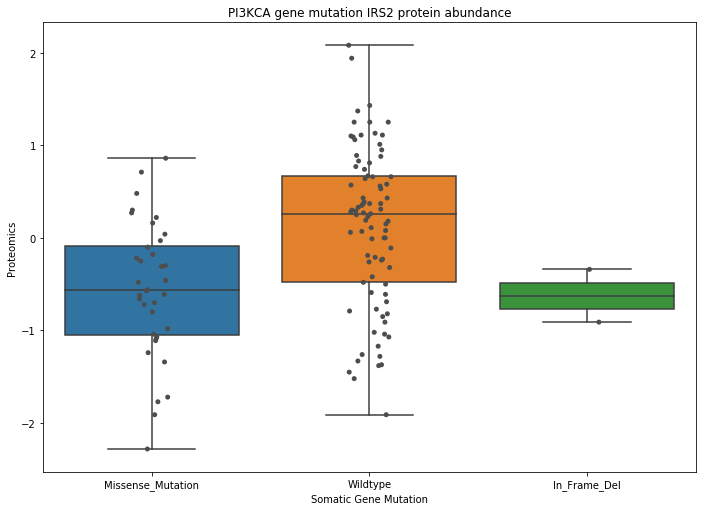

In [14]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
somatic_boxplot = sns.boxplot(data=cross, x="Mutation",y='IRS2', ax = ax)
somatic_boxplot.set_title("PI3KCA gene mutation IRS2 protein abundance")
somatic_boxplot = sns.stripplot(data=cross, x="Mutation", y='IRS2',jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")
plt.show()

# PI3KCA mutation and IRS2 proteome abundance (no control)

<b> Take out the control </b>

In [15]:
proteomics = proteomics[:100]

### Perform a t-test with mutated and non-mutated protein levels

In [16]:
protList = ['IRS2']
pcutoff = 0.05 / len(protList)
gene = 'PIK3CA'

sigResults = [];
for protein in protList: 
    if protein in proteomics.columns:
        cross = CPTAC.compare_mutations(proteomics, protein, gene)
        cross = cross[["Mutation", protein]].dropna(axis=0)
        mutated = cross.loc[cross["Mutation"] == "Missense_Mutation"]
        wt = cross.loc[cross["Mutation"] == "Wildtype"]
        ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
        if(ttest[1] <= pcutoff):
            sigResults.append(protein)
            print("Test for " + protein + ": ")
            print(ttest) 
        else:
            print("Unsignificant result for " + protein + ": ")
            print(ttest) 
            

Unsignificant result for IRS2: 
Ttest_indResult(statistic=-1.898442533077942, pvalue=0.06103116403270328)


 ### We can now plot the data 

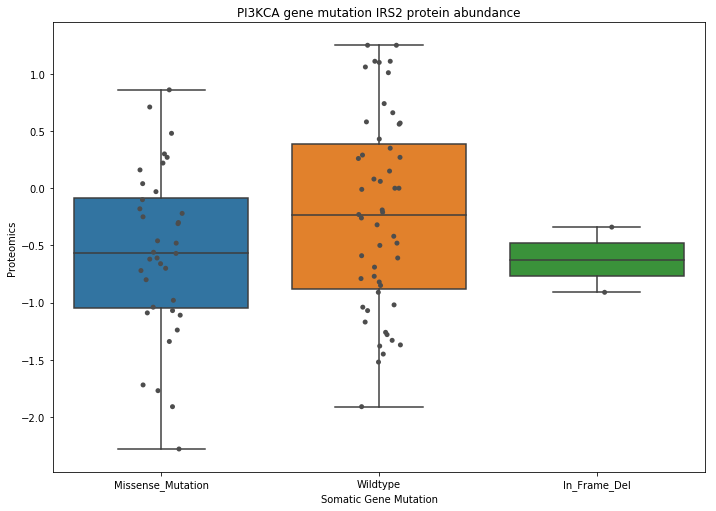

In [17]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
somatic_boxplot = sns.boxplot(data=cross, x="Mutation",y='IRS2', ax = ax)
somatic_boxplot.set_title("PI3KCA gene mutation IRS2 protein abundance")
somatic_boxplot = sns.stripplot(data=cross, x="Mutation", y='IRS2',jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")
plt.show()

# PI3KCA mutation and IRS2 phosphoproteome abundance (with control)

In [18]:
sites = phos.columns;
significantPhosResults = [];
totalSites = 0

phosProtList = ['IRS2']

for protein in phosProtList:
    matchesdf = phos.filter(regex=protein)
    totalSites += len(matchesdf.columns)

pcutoff = 0.05 / totalSites

    

for protein in phosProtList:
    pattern = re.compile(protein)
    isInList = filter(pattern.search, sites)
    if next(isInList, None) is not None:
        phosphositesdf = CPTAC.compare_mutations(phos, protein, gene)
        for site in phosphositesdf.columns:
            if (site is not 'Mutation'):
                sitedf = CPTAC.compare_mutations(phos, site, gene)
                mutateddf = sitedf.loc[sitedf['Mutation'] == 'Missense_Mutation'].dropna(axis=0)
                wtdf = sitedf.loc[sitedf['Mutation'] == 'Wildtype'].dropna(axis=0)
                ttest = scipy.stats.ttest_ind(mutateddf[site], wtdf[site])
                if(ttest[1] <= pcutoff):
                    #significantResults.append(site)
                    print("Test for " + site + ": ")
                    print(ttest)             

Test for IRS2-S1100: 
Ttest_indResult(statistic=-2.967052762963388, pvalue=0.0038313479737464903)
Test for IRS2-S391: 
Ttest_indResult(statistic=-3.431432749253302, pvalue=0.0009382785081659697)
Test for IRS2-S560: 
Ttest_indResult(statistic=-4.045564037779032, pvalue=0.00012553674368530367)
Gene Patient_Type not found in phosphoproteomics data


AttributeError: 'NoneType' object has no attribute 'columns'